<a href="https://colab.research.google.com/github/Jessesantoz/Data-Books/blob/main/Dados_sobre_Livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# > Reedição de Livros:

Uma editora está com um prjeto de lançar uma linha de livros antigos, para isso, precisam de uma análise que apresente as melhores apostas para o projeto.
A partir dos indicadores, precisam saber em quais livros não apostar e quais os melhores nichos e autores para ter sucesso no projeto.



# Importação da Tabela

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
livros = pd.read_csv('/content/drive/MyDrive/Dados/Books/books_data.csv')
livros.columns = ['Id', 'Livros', 'Autores', 'Língua', 'Ano', 'Vendas por Milhão']

livros.tail()

,Id,Livros,Autores,Língua,Ano,Vendas por Milhão
285,285,The No. 1 Ladies Detective Agency,Alexander McCall Smith,English,1999–present,15.0
286,286,Der Regenbogenfisch (Rainbow Fish),Marcus Pfister,German,1992–present,15.0
287,287,The Riftwar Cycle,Raymond E. Feist,English,1982–present,15.0
288,288,The Thrawn trilogy,Timothy Zahn,English,1991–93,15.0
289,289,Wiedźmin (The Witcher),Andrzej Sapkowski,Polish,1990–2013,15.0


In [42]:
livros.values

array([[0, 'A Tale of Two Cities', 'Charles Dickens', 'English', '1859',
        200.0],
       [1, 'The Little Prince (Le Petit Prince)',
        'Antoine de Saint-Exupéry', 'French', '1943', 200.0],
       [2, "Harry Potter and the Philosopher's Stone", 'J. K. Rowling',
        'English', '1997', 120.0],
       ...,
       [287, 'The Riftwar Cycle', 'Raymond E. Feist', 'English',
        '1982–present', 15.0],
       [288, 'The Thrawn trilogy', 'Timothy Zahn', 'English', '1991–93',
        15.0],
       [289, 'Wiedźmin (The Witcher)', 'Andrzej Sapkowski', 'Polish',
        '1990–2013', 15.0]], dtype=object)

# Vendas de Livros

Identificação:

- Média de vendas de livros.

- O mais vendido e o menos vendido.

- Onde esses valores estão mais concentrados.

- Desvio Padrão.

- Moda e Mediana.

In [43]:
livros['Vendas por Milhão'].median()

25.0

In [44]:
livros['Vendas por Milhão'].max()

600.0

In [45]:
livros['Vendas por Milhão'].min()

10.0

In [46]:
vendasMin = livros.filter(items=['Vendas por Milhão', 'Livros', 'Ano']).where(livros['Vendas por Milhão'] <= 10.0)

In [47]:
vendasMin.dropna()

,Vendas por Milhão,Livros,Ano
138,10.0,Tobacco Road,1932
139,10.0,"Ronia, the Robber's Daughter",1981
141,10.0,Diana: Her True Story,1992
142,10.0,The Help,2009
143,10.0,Catch-22,1961
144,10.0,The Stranger (L'Étranger),1942
145,10.0,Eye of the Needle,1978
146,10.0,The Lovely Bones,2002
147,10.0,Wild Swans,1992
148,10.0,Santa Evita,1995


In [48]:
livros['Vendas por Milhão'].value_counts()

20.0     37
10.0     27
15.0     18
50.0     17
30.0     14
         ..
31.0      1
201.0     1
22.5      1
172.0     1
19.0      1
Name: Vendas por Milhão, Length: 76, dtype: int64

In [49]:
desvio_padrao = np.std(livros['Vendas por Milhão'])

In [50]:
desvio_padrao

64.57223472343837

In [52]:
livros['Vendas por Milhão'].mode()

0    20.0
Name: Vendas por Milhão, dtype: float64

In [53]:
livros['Vendas por Milhão'].median()

25.0

# Livros mais vendidos

In [54]:
vendasMax = livros.filter(items=['Vendas por Milhão', 'Livros', 'Ano']).where(livros['Vendas por Milhão'] >= 260.0)

In [55]:
vendasMax.dropna()

,Vendas por Milhão,Livros,Ano
166,600.0,Harry Potter,1997–2007
167,400.0,Goosebumps,1992–present
168,300.0,Perry Mason,1933–1973
169,275.0,Diary of a Wimpy Kid,2007–present
170,260.0,Berenstain Bears,1962–present


# Autores

Identificação:

- Autores das obras mais vendidas.
- Outras obras dos principais autores.
- Repetição de resultados acima da moda, média e mediana.

In [93]:
autores = livros.filter(items=['Autores', 'Vendas por Milhão']).groupby(['Vendas por Milhão']).sum()

In [94]:
topAutores = autores.tail()

In [95]:
topAutores

,Autores
Vendas por Milhão,
260.0,Stan and Jan Berenstain
275.0,Jeff Kinney
300.0,Erle Stanley Gardner
400.0,R. L. Stine
600.0,J. K. Rowling


In [59]:
autores1 = livros.filter(items=['Vendas por Milhão', 'Autores']).where(livros['Autores'] == 'J. K. Rowling').groupby(['Vendas por Milhão']).sum()
autores2 = livros.filter(items=['Vendas por Milhão', 'Autores']).where(livros['Autores'] == 'R. L. Stine').groupby(['Vendas por Milhão']).sum()
autores3 = livros.filter(items=['Vendas por Milhão', 'Autores']).where(livros['Autores'] == 'Erle Stanley Gardner').groupby(['Vendas por Milhão']).sum()
autores4 = livros.filter(items=['Vendas por Milhão', 'Autores']).where(livros['Autores'] == 'Jeff Kinney').groupby(['Vendas por Milhão']).sum()
autores5 = livros.filter(items=['Vendas por Milhão', 'Autores']).where(livros['Autores'] == 'Stan and Jan Berenstain').groupby(['Vendas por Milhão']).sum()

In [60]:
autores1

,Autores
Vendas por Milhão,
65.0,J. K. RowlingJ. K. RowlingJ. K. RowlingJ. K. R...
77.0,J. K. Rowling
120.0,J. K. Rowling
600.0,J. K. Rowling


In [61]:
autores1L = livros.filter(items=['Vendas por Milhão', 'Autores', 'Livros']).where(livros['Autores'] == 'J. K. Rowling')\
.groupby(['Vendas por Milhão']).sum()

autores1L

,Autores,Livros
Vendas por Milhão,,
65.0,J. K. RowlingJ. K. RowlingJ. K. RowlingJ. K. R...,Harry Potter and the Prisoner of AzkabanHarry ...
77.0,J. K. Rowling,Harry Potter and the Chamber of Secrets
120.0,J. K. Rowling,Harry Potter and the Philosopher's Stone
600.0,J. K. Rowling,Harry Potter


In [62]:
autores2

,Autores
Vendas por Milhão,
80.0,R. L. Stine
400.0,R. L. Stine


In [63]:
autores2L = livros.filter(items=['Vendas por Milhão', 'Autores', 'Livros']).where(livros['Autores'] == 'R. L. Stine')\
.groupby(['Vendas por Milhão']).sum()

autores2L

,Autores,Livros
Vendas por Milhão,,
80.0,R. L. Stine,Fear Street
400.0,R. L. Stine,Goosebumps


In [64]:
autores3

,Autores
Vendas por Milhão,
300.0,Erle Stanley Gardner


In [65]:
autores4

,Autores
Vendas por Milhão,
275.0,Jeff Kinney


In [66]:
autores5

,Autores
Vendas por Milhão,
260.0,Stan and Jan Berenstain


# Rendimento dos anos

- Mínimo e maximo (ano de produção contados no df)
- Tendência e pico de produção por ano.

In [67]:
livros.Ano.values

array(['1859', '1943', '1997', '1939', '1791', '1937', '1887', '2003',
       '1998', '1999', '2000', '2003', '2005', '2007', '1988', '1951',
       '1992', '1967', '1955', '1880', '1946', '1908', '1877', '1980',
       '1975', '1972', '1976', '1952', '1955', '1902', '1970', '1969',
       '1899', '1960', '1979', '1980', '1991', '2000', '1939', '1979',
       '1932', '1869', '1881', '1947', '1976', '1977', '2003', '1966',
       '1936', '1925', '1936', '1938', '1951', '2005', '2009', '2008',
       '1961', '1945', '1998', '1988', '1788', '1934', '1908', '1989',
       '1981', '1935', '1993', '2012', '2015', '2007', '1936', '1969',
       '1970', '2009', '2010', '1988', '1957', '2012', '1974', '1958',
       '2004', '1971', '1974', '1986', '1977', '1984', '1885', '1982',
       '1813', '1950', '1923', '1963', '1952', '2006', '1973', '1965',
       '1964', '1968', '2018', '1988', '2005', '1995', '1947', '1979',
       '2014', '2011', '1967', '1994', '1975', '1942', '1989', '1985',
      

In [68]:
livros.Ano.min()

'1304'

In [69]:
livros.Ano.max()

'2018'

In [70]:
anoVendas = livros.filter(items=['Ano', 'Vendas por Milhão']).groupby(['Vendas por Milhão', 'Ano']).count()

In [71]:
anoVendas.tail(20)

Empty DataFrame
Columns: []
Index: [(160.0, 1977–present), (160.0, 1986–present), (160.0, 2005–2020), (172.0, 1986–present), (180.0, 1997–present), (180.0, 2005–present), (200.0, 1859), (200.0, 1930–present), (200.0, 1943), (200.0, 1949–2001), (200.0, 1949–present), (200.0, 2000–present), (201.0, 1945–2011), (250.0, 1979–present), (250.0, 1983–2003), (260.0, 1962–present), (275.0, 2007–present), (300.0, 1933–1973), (400.0, 1992–present), (600.0, 1997–2007)]

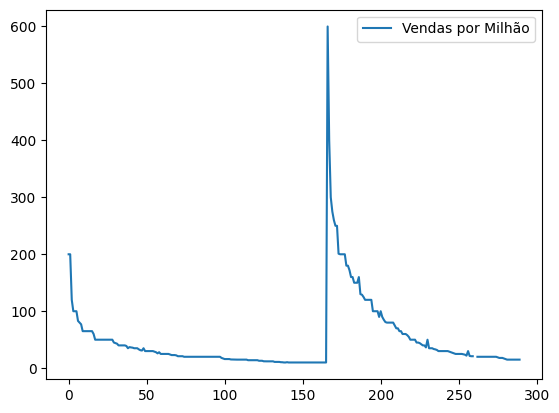

In [72]:
anoGraf = livros.filter(items=['Ano', 'Vendas por Milhão']).plot()

# Língua mais vendida

- Distribuição de produção por língua.

- Língua das obras mais vendidas.

In [73]:
linguasVendidas = livros.filter(items=['Língua', 'Vendas por Milhão']).groupby(['Língua']).count()

In [74]:
linguasVendidas

,Vendas por Milhão
Língua,
Chinese,6
Czech,1
Dutch,2
English,209
French,9
German,6
Gujarati,1
Italian,5
Japanese,26


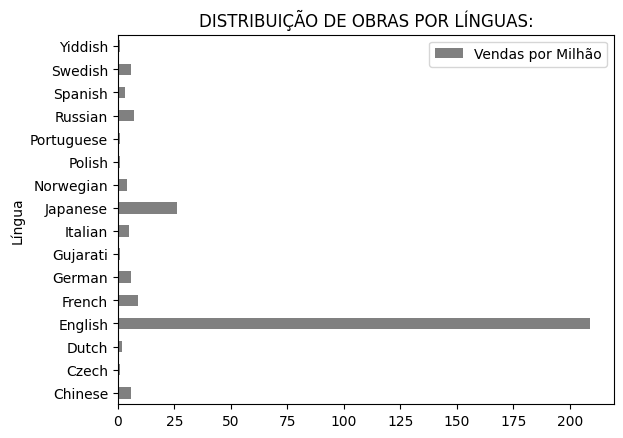

In [98]:
linguasVendidas.plot(kind='barh', color='gray')
plt.title('DISTRIBUIÇÃO DE OBRAS POR LÍNGUAS:')
plt.show()

In [75]:
vendasMaxLingua = livros.filter(items=['Vendas por Milhão', 'Livros', 'Língua']).where(livros['Vendas por Milhão'] >= 260.0)

In [76]:
vendasMaxLingua.dropna()

,Vendas por Milhão,Livros,Língua
166,600.0,Harry Potter,English
167,400.0,Goosebumps,English
168,300.0,Perry Mason,English
169,275.0,Diary of a Wimpy Kid,English
170,260.0,Berenstain Bears,English


# Conclusão

As melhores opções de reedição, são:

Livros da J. K. Rowling ou de R. L. Stine.
(pois são autores que venderam mais de um livros acima da média)

R. L. Stine pode ser uma opção menos usual no mercado, enquanto J.K é uma autora que sempre está sendo relançada, além disso, os dois ainda estão em atividade.